In [1]:
#importing both pd and np  modules 
import pandas as pd
import numpy as np

In [2]:
#reading csv files

us_states_data = pd.read_csv('us-states.csv')
partisan_lean_states_data = pd.read_csv('fivethirtyeight_partisan_lean_STATES.csv')

In [3]:
#displaying  us-states.csv
us_states_data.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
3,2020-01-24,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
4,2020-01-24,USA-17,Illinois,1,0.14,0.0,0,0.0,0.0


In [4]:
#selecting only few columns whichg we require
us_states_data=us_states_data[['date','state','cases_avg_per_100k','deaths_avg_per_100k']]

us_states_data.head()

,date,state,cases_avg_per_100k,deaths_avg_per_100k
0,2020-01-21,Washington,0.0,0.0
1,2020-01-22,Washington,0.0,0.0
2,2020-01-23,Washington,0.0,0.0
3,2020-01-24,Washington,0.0,0.0
4,2020-01-24,Illinois,0.0,0.0


In [5]:
#Mofifying the M/D/Y---M/Y 

us_states_data['date']=pd.to_datetime(us_states_data['date']).dt.to_period('M')

In [6]:
us_states_data=us_states_data.groupby(['date','state'], as_index=False).mean()

us_states_data.head()

,date,state,cases_avg_per_100k,deaths_avg_per_100k
0,2020-01,Arizona,0.0,0.0
1,2020-01,California,0.0,0.0
2,2020-01,Illinois,0.0,0.0
3,2020-01,Washington,0.0,0.0
4,2020-02,Arizona,0.0,0.0


In [7]:
partisan_lean_states_data.head()

,state,2021
0,Alabama,-29.59438
1,Alaska,-14.62028
2,Arizona,-7.58754
3,Arkansas,-31.83641
4,California,25.45492


In [8]:
#Merging  files
Merged_Data=pd.merge(us_states_data,partisan_lean_states_data)


In [9]:
Merged_Data.head()

,date,state,cases_avg_per_100k,deaths_avg_per_100k,2021
0,2020-01,Arizona,0.000000,0.000000,-7.58754
1,2020-02,Arizona,0.000000,0.000000,-7.58754
2,2020-03,Arizona,0.359355,0.005484,-7.58754
3,2020-04,Arizona,2.723333,0.124333,-7.58754
4,2020-05,Arizona,4.980323,0.229032,-7.58754


In [10]:
Merged_Data=Merged_Data.rename(columns={"cases_avg_per_100k":"cases_avg_per_100k_mean",
                                        "deaths_avg_per_100k":"deaths_avg_per_100k_mean"
                                        ,"2021":"partisan_leaning"})


In [11]:
Merged_Data.head()

,date,state,cases_avg_per_100k_mean,deaths_avg_per_100k_mean,partisan_leaning
0,2020-01,Arizona,0.000000,0.000000,-7.58754
1,2020-02,Arizona,0.000000,0.000000,-7.58754
2,2020-03,Arizona,0.359355,0.005484,-7.58754
3,2020-04,Arizona,2.723333,0.124333,-7.58754
4,2020-05,Arizona,4.980323,0.229032,-7.58754


In [12]:
#code for Questions 1

In [13]:
Merged_Data["red_blue"]= np.where(Merged_Data['partisan_leaning'] < 0 , 'red', 'blue')


In [14]:
Merged_Data.head()

,date,state,cases_avg_per_100k_mean,deaths_avg_per_100k_mean,partisan_leaning,red_blue
0,2020-01,Arizona,0.000000,0.000000,-7.58754,red
1,2020-02,Arizona,0.000000,0.000000,-7.58754,red
2,2020-03,Arizona,0.359355,0.005484,-7.58754,red
3,2020-04,Arizona,2.723333,0.124333,-7.58754,red
4,2020-05,Arizona,4.980323,0.229032,-7.58754,red


In [15]:
#code for  Questions 2(i)

In [16]:
Merged_Data[['red_blue','cases_avg_per_100k_mean','deaths_avg_per_100k_mean']].groupby(['red_blue'], as_index=False).mean()


,red_blue,cases_avg_per_100k_mean,deaths_avg_per_100k_mean
0,blue,28.374545,0.308691
1,red,33.912174,0.406606


In [17]:
#code for Questions 2(ii)

In [18]:
Mean_for_Merged_Data=Merged_Data[['date','red_blue',
                                  'cases_avg_per_100k_mean',
                                  'deaths_avg_per_100k_mean']].groupby(['red_blue','date']
                                                                                  , as_index=False).mean()

In [19]:
Mean_for_Merged_Data

,red_blue,date,cases_avg_per_100k_mean,deaths_avg_per_100k_mean
0,blue,2020-01,0.000000,0.000000
1,blue,2020-02,0.000552,0.000000
2,blue,2020-03,1.540241,0.027074
3,blue,2020-04,11.974200,0.704250
4,blue,2020-05,10.432403,0.677177
5,blue,2020-06,5.307967,0.300367
6,blue,2020-07,7.104339,0.139065
7,blue,2020-08,7.825790,0.116903
8,blue,2020-09,7.224067,0.109650
9,blue,2020-10,12.121194,0.137532


In [20]:
Mean_for_Total_Cases= Mean_for_Merged_Data.pivot(index='date', columns='red_blue', values='cases_avg_per_100k_mean')

In [21]:
Mean_for_Total_Cases

red_blue,blue,red
date,,
2020-01,0.000000,0.000000
2020-02,0.000552,0.009846
2020-03,1.540241,0.703291
2020-04,11.974200,4.714527
2020-05,10.432403,5.440968
2020-06,5.307967,7.966774
2020-07,7.104339,19.213174
2020-08,7.825790,17.124152
2020-09,7.224067,17.331989


<AxesSubplot:xlabel='date'>

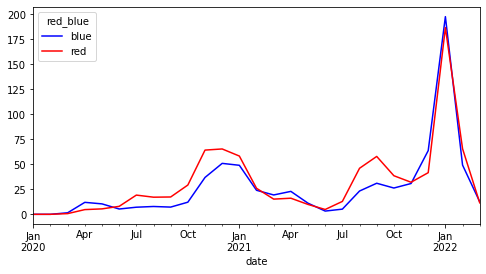

In [22]:
Mean_for_Total_Cases.plot(color=Mean_for_Total_Cases.columns, figsize=(8, 4))

In [23]:
Mean_for_Total_Deaths= Mean_for_Merged_Data.pivot(index='date', columns='red_blue', values='deaths_avg_per_100k_mean')


In [24]:
Mean_for_Total_Deaths

red_blue,blue,red
date,,
2020-01,0.000000,0.000000
2020-02,0.000000,0.000000
2020-03,0.027074,0.012579
2020-04,0.704250,0.212118
2020-05,0.677177,0.229282
2020-06,0.300367,0.153882
2020-07,0.139065,0.210656
2020-08,0.116903,0.314579
2020-09,0.109650,0.263742


<AxesSubplot:xlabel='date'>

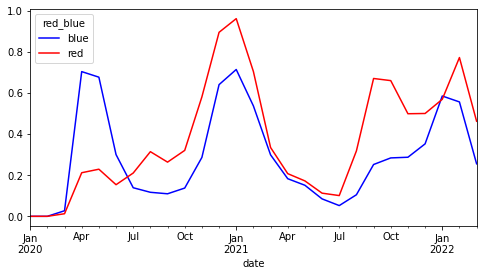

In [25]:
Mean_for_Total_Deaths.plot(color=Mean_for_Total_Deaths.columns, figsize=(8, 4))